In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data_dir =  "/path/proc_map_dataset1/"
out_dir =  "/path/output_data1/"
all_fname_files = [f for f in os.listdir(data_dir) if f.endswith('.txt')]
print(len(all_fname_files))

2700


In [3]:
all_fname_files[-1]

'fname_972.txt'

In [4]:
column_names = ["proc_name", "level", "x", "y", "T"]
df_extract = [pd.read_csv(data_dir + f, low_memory=False,sep = '\s+',header=0,names=column_names) for f in all_fname_files]
df = pd.concat(df_extract)

In [5]:
df.head(5)

,proc_name,level,x,y,T
0,957,1,68.158,182.069,256.041
1,957,1,68.171,180.000,255.943
2,957,1,66.748,185.061,256.377
3,957,1,66.817,181.937,256.414
4,957,1,66.829,180.000,256.294


In [7]:
print(df["x"].min(),df["x"].max(), df["y"].min(),df["y"].max())

-90.0 90.0 0.0 360.0


In [8]:
lon_array = np.asarray(df["y"])
lat_array = np.asarray(df["x"])
uvel = np.asarray(df["T"])

print (np.min(lon_array),np.max(lon_array))
print (np.min(lat_array),np.max(lat_array))

0.0 360.0
-90.0 90.0


45902


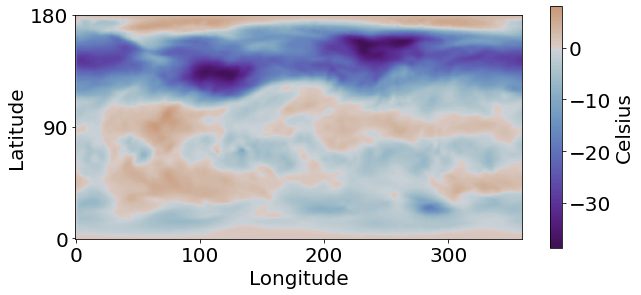

In [34]:
import matplotlib.colors as matcolors
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 20})

#cmp2
top = plt.get_cmap('twilight_shifted', 256)
top_cmp = matcolors.ListedColormap(top(np.linspace(0.55, 1, 256)))
bottom = cm.get_cmap('twilight_shifted', 256)
bottom_cmp = matcolors.ListedColormap(bottom(np.linspace(0.05,0.45,256)))

white = np.array(([256/256, 256/256, 256/256, 1]))

newcolors = np.vstack((bottom_cmp(np.linspace(0, 1, 256)),
                       top_cmp(np.linspace(0, 1, 256))))
newcmp = matcolors.ListedColormap(newcolors, name='OrangeBlue')
newcmp2 = matcolors.ListedColormap(newcmp(np.linspace(0.0, 0.605, 512)))

## Render using python grid data
lon_dim = 360
lat_dim = 180

points =  np.column_stack((lon_array, lat_array))
## create 2D regular grid
grid_x, grid_y = np.mgrid[0:360:360j, -89:89:180j] ## grid for whole world
cur_loc = np.zeros((lat_dim*lon_dim,2),dtype='float')


ind = 0
for j in range(lat_dim):
    for i in range(lon_dim):
        cur_loc[ind,:] = np.array([grid_x[i][j],grid_y[i][j]])
        ind = ind+1

print(len(points))

grid_z0 = griddata(points, uvel, cur_loc, method='linear')
grid_z0 = grid_z0 - 273.15

grid_z0_2d = grid_z0.reshape((lat_dim,lon_dim))
plt.imshow(grid_z0_2d, origin='lower',cmap=plt.get_cmap(newcmp2))
plt.colorbar(orientation="vertical", shrink=0.74, label="Celsius")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.yticks(np.arange(0, 190, 90))

plt.savefig('sim_data2.png')

In [35]:
len(df["x"].unique())

6097

In [36]:
len(df["y"].unique())

7649

In [37]:
df_data = df[["x", "y", "T"]]

In [38]:
grid_array = df_data[["x", "y"]]
temp_array = df_data["T"]

In [39]:
grid_array

,x,y
0,68.158,182.069
1,68.171,180.000
2,66.748,185.061
3,66.817,181.937
4,66.829,180.000
...,...,...
12,78.522,135.000
13,77.933,132.194
14,78.769,142.906
15,77.933,137.806


In [40]:
temp_array

0     256.041
1     255.943
2     256.377
3     256.414
4     256.294
       ...   
12    266.556
13    267.323
14    263.642
15    264.273
16    265.007
Name: T, Length: 45902, dtype: float64

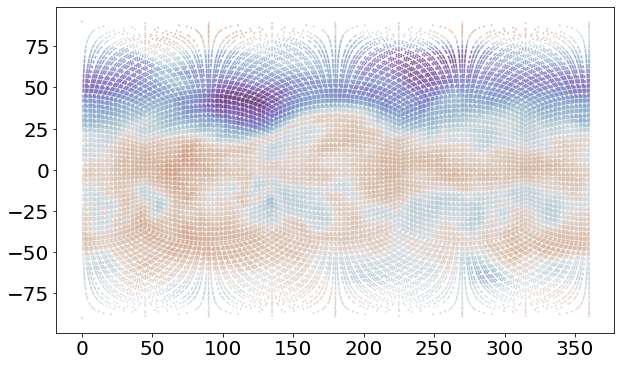

In [41]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as matcolors
from matplotlib import cm


top = plt.get_cmap('twilight_shifted', 256)
top_cmp = matcolors.ListedColormap(top(np.linspace(0.55, 1, 256)))
bottom = cm.get_cmap('twilight_shifted', 256)
bottom_cmp = matcolors.ListedColormap(bottom(np.linspace(0.05,0.45,256)))

white = np.array(([256/256, 256/256, 256/256, 1]))

newcolors = np.vstack((bottom_cmp(np.linspace(0, 1, 256)),
                       top_cmp(np.linspace(0, 1, 256))))
newcmp = matcolors.ListedColormap(newcolors, name='OrangeBlue')
newcmp2 = matcolors.ListedColormap(newcmp(np.linspace(0.0, 0.64, 512)))

x = df_data["x"]
y = df_data["y"]

plt.scatter(y,x, s=1, c=temp_array,alpha=0.5, cmap=plt.get_cmap(newcmp2))
plt.show()

In [42]:
#Create a global grid of 100 x 150 values
X_grid, Y_grid = np.mgrid[df["x"].min():df["x"].max():100j,df["y"].min():df["y"].max():200j]

In [43]:
from scipy.interpolate import griddata

In [44]:
points = grid_array.values
values = temp_array.values

In [51]:
linear_temp = griddata(points, values, (X_grid, Y_grid), method='nearest')
linear_temp -= 273.15

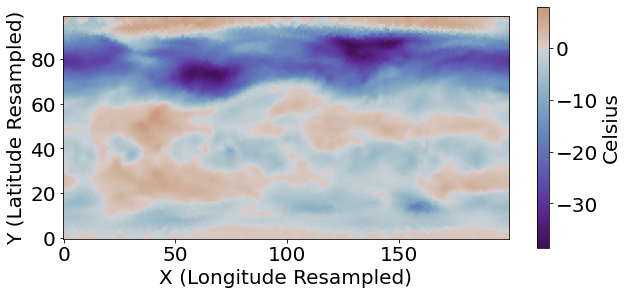

In [52]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as matcolors
from matplotlib import cm

#cmp2
top = plt.get_cmap('twilight_shifted', 256)
top_cmp = matcolors.ListedColormap(top(np.linspace(0.55, 1, 256)))
bottom = cm.get_cmap('twilight_shifted', 256)
bottom_cmp = matcolors.ListedColormap(bottom(np.linspace(0.05,0.45,256)))

white = np.array(([256/256, 256/256, 256/256, 1]))

newcolors = np.vstack((bottom_cmp(np.linspace(0, 1, 256)),
                       top_cmp(np.linspace(0, 1, 256))))
newcmp = matcolors.ListedColormap(newcolors, name='OrangeBlue')
newcmp2 = matcolors.ListedColormap(newcmp(np.linspace(0.0, 0.605, 512)))

plt.imshow(linear_temp, origin='lower', cmap=plt.get_cmap(newcmp2))
plt.colorbar(orientation="vertical", shrink=0.74, label="Celsius")
plt.xlabel("X (Longitude Resampled)")
plt.ylabel("Y (Latitude Resampled)")

plt.savefig("interpolated.png")

In [ ]:
linear_temp.shape

In [ ]:
array_sum = np.sum(linear_temp)
array_has_nan = np.isnan(array_sum)
array_has_nan

In [ ]:
values.shape

In [ ]:
sample_length = 32
num_samples = 20

indices_x = np.random.choice(X_grid.shape[0]-sample_length, num_samples, replace=False)
indices_y = np.random.choice(Y_grid.shape[0]-sample_length, num_samples, replace=False)

indices_x = [54, 17, 7, 5, 25, 66, 47, 8, 46, 30, 1, 61, 38, 44, 55, 64, 21, 10, 41, 9]
indices_y = [11, 40, 37, 65, 47, 3, 31, 55, 52, 53, 56, 59, 16, 36, 0, 50, 57, 19, 15, 27]

print(indices_x)
print(indices_y)

In [ ]:
indx_grid = [[ix,iy] for ix in indices_x for iy in indices_y]

In [ ]:
# test a sub grid
s = indx_grid[0]
id_x_s = s[0]
id_x_e = s[0] + sample_length
id_y_s = s[1]
id_y_e = s[1] + sample_length

x1 = X_grid[id_x_s:id_x_e,id_y_s:id_y_e]
y1 = Y_grid[id_x_s:id_x_e,id_y_s:id_y_e]
temp = linear_temp[id_x_s:id_x_e,id_y_s:id_y_e]
print(id_x_s, id_x_e, id_y_s, id_y_e)

In [ ]:
temp.shape
linear_temp.shape

In [ ]:
plt.imshow(temp ,origin='lower',  cmap=plt.get_cmap(newcmp2) )

In [ ]:
data_xy = np.vstack([x1.ravel(), y1.ravel()]);

In [ ]:
scaler_xy = MinMaxScaler()
data_xy_transforme = scaler_xy.fit_transform(data_xy.T)
data_xy_transforme.shape

In [ ]:
data_xy_transforme[:,1]

In [ ]:
scaler_z = StandardScaler()
scaled_temp = scaler_z.fit_transform(temp.flatten().reshape(-1, 1))
scaled_temp = scaled_temp.reshape((sample_length,sample_length))
print(scaled_temp)

In [ ]:
# plot the sample sub grid
plt.imshow(scaled_temp.T, extent=(0,1, 0, 1),origin='lower')

In [ ]:
num_sample = 0
scaler_z = StandardScaler()
scaler_xy = MinMaxScaler()

for sample in indx_grid:
    
    # id for x
    id_x_start = sample[0]
    id_x_end = sample[0] + sample_length
    
    # id for y
    id_y_start = sample[1]
    id_y_end = sample[1] + sample_length
    
    # get data slice
    x1 = X_grid[id_x_start:id_x_end,id_y_start:id_y_end]
    y1 = Y_grid[id_x_start:id_x_end,id_y_start:id_y_end]
    temp = linear_temp[id_x_start:id_x_end,id_y_start:id_y_end].flatten()

    # Z - Normalization
    scaled_temp = scaler_z.fit_transform(temp.reshape(-1, 1))
    scaled_temp = scaled_temp.flatten()

    # create (x,y) data pairs
    data = np.vstack([x1.ravel(), y1.ravel()])
    data = data.T
    data_scaled = scaler_xy.fit_transform(data)
    
    # filename
    file_name = out_dir + "sample" + str(num_sample) + ".npz"
    np.savez(file_name, data=data_scaled, y=scaled_temp)
    num_sample += 1

In [ ]:
npzfile = np.load(out_dir + "sample20.npz")

In [ ]:
sorted(npzfile.files)

In [ ]:
print(npzfile['data'][:,0].min(),npzfile['data'][:,0].max(),npzfile['data'][:,1].min(),npzfile['data'][:,1].max())